In [1]:
#import the libraries
import re
import pandas as pd 
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

# Enable inline plotting
%matplotlib inline

In [2]:
#read in the data
data = 'Skills_Verification_Data_FIFA_18.csv'
# df = pd.read_csv(data, encoding='latin-1')

file = open(data, mode='r', buffering=-1, encoding=None,
             errors=None, newline=None, closefd=True, opener=None)

df = pd.read_csv(file)

In [3]:
df.head(2)

,No,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,$565,...,75,96,33,28,26,6,11,15,14,8
1,1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,$405,...,85,95,28,31,23,7,11,15,14,11


In [4]:
# check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 55 columns):
No                          501 non-null int64
ID                          501 non-null int64
Name                        501 non-null object
Age                         501 non-null int64
Nationality                 501 non-null object
Overall                     501 non-null int64
Potential                   501 non-null int64
Club                        500 non-null object
Value                       501 non-null object
Wage                        501 non-null object
Preferred Foot              501 non-null object
International Reputation    501 non-null int64
Weak Foot                   501 non-null int64
Skill Moves                 501 non-null int64
Work Rate                   501 non-null object
Position                    501 non-null object
Jersey Number               501 non-null int64
Joined                      486 non-null object
Contract Valid Until        500 non-null

In [5]:
#get the shape of the data
df.shape

(501, 55)

In [6]:
#update to ensure all rows & columns are visible
pd.set_option('display.max_columns', 55)
pd.set_option('display.max_rows', 501)

#view the data
df.head(2)

,No,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,$565,Left,5,4,4,Medium/ Medium,RF,10,1-Jul-04,2021,5'7,159lbs,84,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8
1,1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,$405,Right,5,4,5,High/ Low,ST,7,10-Jul-18,2022,6'2,183lbs,84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23,7,11,15,14,11


In [7]:
# check the df for null/missing values
df.isna().sum()

No                           0
ID                           0
Name                         0
Age                          0
Nationality                  0
Overall                      0
Potential                    0
Club                         1
Value                        0
Wage                         0
Preferred Foot               0
International Reputation     0
Weak Foot                    0
Skill Moves                  0
Work Rate                    0
Position                     0
Jersey Number                0
Joined                      15
Contract Valid Until         1
Height                       0
Weight                       0
Crossing                     0
Finishing                    0
HeadingAccuracy              0
ShortPassing                 0
Volleys                      0
Dribbling                    0
Curve                        0
FKAccuracy                   0
LongPassing                  0
BallControl                  0
Acceleration                 0
SprintSp

In [8]:
# check for null and duplicate values
print(df['ID'].isna().sum())

0


In [9]:
df[df.ID.duplicated(keep=False)].sort_values("ID")

,No,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes


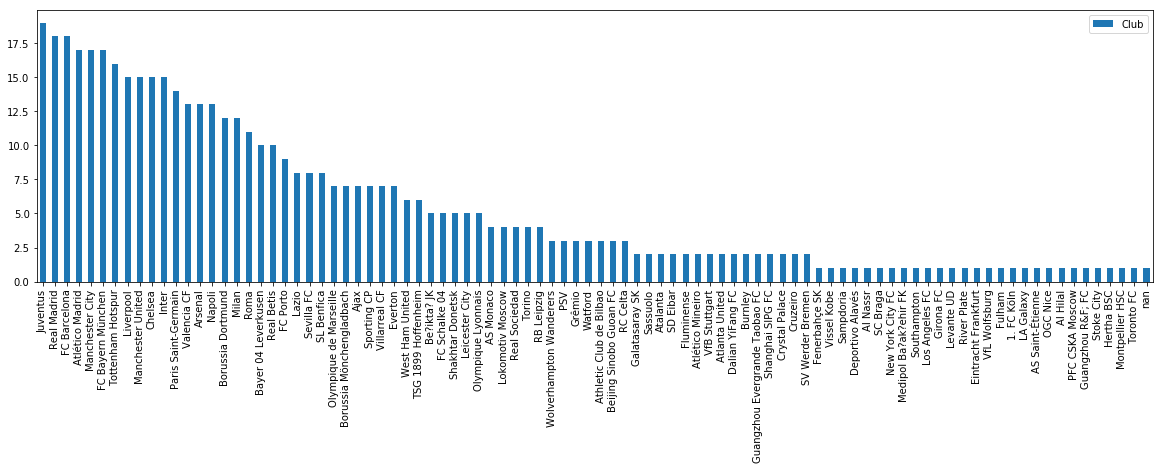

In [10]:
# # examine the values
pd.DataFrame(df['Club'].value_counts(dropna=False)).plot(kind='bar',figsize=(20,5))

In [11]:
# examine the values
df['Joined'].value_counts(dropna=False)

# observation: column ignored as not considered relevent to the analysis at this point

1-Jul-18     24
1-Jul-16     22
1-Jul-17     20
1-Jul-15     18
NaN          15
1-Jul-14     14
1-Jan-18     12
1-Jul-11     10
1-Jul-13     10
1-Jul-12     10
1-Jul-10      8
2-Jul-18      6
31-Aug-16     6
24-Jul-17     4
1-Aug-12      4
21-Jul-17     4
13-Jul-18     4
7-Jul-17      4
10-Jul-18     4
30-Aug-16     3
2-Aug-16      3
5-Jul-18      3
31-Jan-18     3
17-Aug-18     3
1-Jan-17      3
9-Aug-18      3
3-Jul-17      3
11-Jul-18     3
12-Jul-18     3
1-Jul-07      3
31-Aug-17     3
14-Jul-17     3
1-Jan-11      3
2-Feb-15      3
4-Jul-17      3
3-Aug-16      3
1-Sep-15      3
9-Aug-16      3
1-Jan-14      2
18-Aug-17     2
12-Jul-15     2
3-Jul-18      2
16-Jul-16     2
28-Aug-15     2
13-Jul-17     2
5-Jul-17      2
15-Jun-17     2
8-Jul-17      2
26-Aug-14     2
2-Sep-13      2
16-Jul-18     2
30-Aug-13     2
13-Jul-16     2
10-Jul-17     2
2-Jul-15      2
22-Jul-15     2
12-Jul-17     2
28-Aug-16     2
1-Jun-11      2
30-Jan-18     2
22-Jan-18     2
1-Jul-08      2
2-Aug-17

In [12]:
# examine the values
df['Contract Valid Until'].unique()

array(['2021', '2022', '2020', '2023', '2019', '2024', '30-Jun-19',
       '2025', '2026', '31-Dec-18', '2018', nan], dtype=object)

In [13]:
# examine the values
df['Value'].unique()

# observation: need to treat 0

array(['€110.5M', '€77M', '€118.5M', '€72M', '€102M', '€93M', '€67M',
       '€80M', '€51M', '€68M', '€76.5M', '€44M', '€60M', '€63M', '€89M',
       '€83.5M', '€78M', '€58M', '€53.5M', '€51.5M', '€38M', '€64.5M',
       '€27M', '€81M', '€69.5M', '€59.5M', '€62M', '€73.5M', '€59M',
       '€46M', '€43M', '€36M', '€57M', '€24M', '€30M', '€4M', '€64M',
       '€30.5M', '€62.5M', '€52M', '€45M', '€34M', '€46.5M', '€61M',
       '€41.5M', '€44.5M', '€56.5M', '€53M', '€50M', '€55M', '€36.5M',
       '€45.5M', '€43.5M', '€35M', '€39M', '€18M', '€21.5M', '€50.5M',
       '€54M', '€40.5M', '€37.5M', '€28.5M', '€37M', '€32M', '€26M',
       '€33M', '€38.5M', '€35.5M', '€9M', '€15.5M', '€22M', '€14M',
       '€42.5M', '€31.5M', '€42M', '€25M', '€29.5M', '€31M', '€24.5M',
       '€27.5M', '€29M', '€16.5M', '€23M', '€19M', '€4.2M', '€40M',
       '€41M', '€28M', '€22.5M', '€34.5M', '€32.5M', '€20M', '€26.5M',
       '€25.5M', '€21M', '€13M', '€17.5M', '€11.5M', '€8M', '€6M',
       '€19.5M', '€6.5

In [14]:
# remove the first character from the string
df['Value'] = df['Value'].str.strip(' €')
df['Value'] = df['Value'].str.strip('M').astype('float')

In [15]:
# view the unique values
df['Value'].unique()

array([110.5,  77. , 118.5,  72. , 102. ,  93. ,  67. ,  80. ,  51. ,
        68. ,  76.5,  44. ,  60. ,  63. ,  89. ,  83.5,  78. ,  58. ,
        53.5,  51.5,  38. ,  64.5,  27. ,  81. ,  69.5,  59.5,  62. ,
        73.5,  59. ,  46. ,  43. ,  36. ,  57. ,  24. ,  30. ,   4. ,
        64. ,  30.5,  62.5,  52. ,  45. ,  34. ,  46.5,  61. ,  41.5,
        44.5,  56.5,  53. ,  50. ,  55. ,  36.5,  45.5,  43.5,  35. ,
        39. ,  18. ,  21.5,  50.5,  54. ,  40.5,  37.5,  28.5,  37. ,
        32. ,  26. ,  33. ,  38.5,  35.5,   9. ,  15.5,  22. ,  14. ,
        42.5,  31.5,  42. ,  25. ,  29.5,  31. ,  24.5,  27.5,  29. ,
        16.5,  23. ,  19. ,   4.2,  40. ,  41. ,  28. ,  22.5,  34.5,
        32.5,  20. ,  26.5,  25.5,  21. ,  13. ,  17.5,  11.5,   8. ,
         6. ,  19.5,   6.5,  20.5,  23.5,  18.5,  17. ,  12.5,  15. ,
        13.5,   4.8,   3. ,   1.5,  16. ,  10. ,  11. ,   7. ,  14.5,
         5.5,  10.5,   4.5,  12. ,   0. ])

In [16]:
df['Updated_Value'] = np.round((df['Value'] * 100_000),0).astype('int')
df['Updated_Value'].head(2)

0    11050000
1     7700000
Name: Updated_Value, dtype: int32

In [17]:
# examine the column
df['Wage'].unique()

# observation: extra spaces and $ 

array(['$565 ', '$405 ', '$290 ', '$260 ', '$355 ', '$340 ', '$420 ',
       '$455 ', '$380 ', '$94 ', '$205 ', '$125 ', '$285 ', '$225 ',
       '$145 ', '$240 ', '$315 ', '$200 ', '$130 ', '$300 ', '$215 ',
       '$100 ', '$255 ', '$165 ', '$265 ', '$160 ', '$150 ', '$245 ',
       '$110 ', '$77 ', '$115 ', '$210 ', '$195 ', '$230 ', '$250 ',
       '$135 ', '$155 ', '$180 ', '$175 ', '$190 ', '$185 ', '$21 ',
       '$82 ', '$73 ', '$92 ', '$88 ', '$96 ', '$170 ', '$66 ', '$235 ',
       '$28 ', '$105 ', '$38 ', '$81 ', '$57 ', '$15 ', '$63 ', '$22 ',
       '$84 ', '$120 ', '$90 ', '$72 ', '$93 ', '$45 ', '$74 ', '$51 ',
       '$42 ', '$31 ', '$75 ', '$25 ', '$140 ', '$41 ', '$78 ', '$53 ',
       '$95 ', '$80 ', '$43 ', '$60 ', '$85 ', '$64 ', '$67 ', '$18 ',
       '$70 ', '$91 ', '$20 ', '$49 ', '$87 ', '$86 ', '$26 ', '$29 ',
       '$55 ', '$35 ', '$33 ', '$56 ', '$30 ', '$11 ', '$59 ', '$23 ',
       '$46 ', '$39 ', '$32 ', '$36 ', '$98 ', '$54 ', '$68 ', '$58 ',
       '$2

In [18]:
# clean the column
df['Wage'] = df['Wage'].str.strip()
df['Wage'] = df['Wage'].str.strip('$').astype('float')

In [19]:
# examine the column
df['Wage'].unique()

array([565., 405., 290., 260., 355., 340., 420., 455., 380.,  94., 205.,
       125., 285., 225., 145., 240., 315., 200., 130., 300., 215., 100.,
       255., 165., 265., 160., 150., 245., 110.,  77., 115., 210., 195.,
       230., 250., 135., 155., 180., 175., 190., 185.,  21.,  82.,  73.,
        92.,  88.,  96., 170.,  66., 235.,  28., 105.,  38.,  81.,  57.,
        15.,  63.,  22.,  84., 120.,  90.,  72.,  93.,  45.,  74.,  51.,
        42.,  31.,  75.,  25., 140.,  41.,  78.,  53.,  95.,  80.,  43.,
        60.,  85.,  64.,  67.,  18.,  70.,  91.,  20.,  49.,  87.,  86.,
        26.,  29.,  55.,  35.,  33.,  56.,  30.,  11.,  59.,  23.,  46.,
        39.,  32.,  36.,  98.,  54.,  68.,  58.,  27.,  40.,  44.,  19.,
         1.,  61.,  50.,  99.,  17.,  52.,  62.,  12.,  10.,  71.,  14.,
        76.,  48.,  65.,  69.,  24.,  34.,  16.,  37.,  47.,  89.,   0.,
        97.,  79.])

In [20]:
# update the wage column
df['Updated_Wage'] = (df['Wage'] * 100_000).astype('int')
df['Updated_Wage'].head(3)

0    56500000
1    40500000
2    29000000
Name: Updated_Wage, dtype: int32

In [21]:
# view the unique values
print(df['Work Rate'].unique())

['Medium/ Medium' 'High/ Low' 'High/ Medium' 'High/ High' 'Medium/ High'
 'Medium/ Low' 'Low/ High' 'Low/ Medium']


In [22]:
# update the column
wr_list = []

for index, wr in df.iterrows():
    if wr['Work Rate'] == 'Medium/ Medium':
        val = 2+2
        wr_list.append(val)
    elif wr['Work Rate'] == 'High/ Low':
        val = 3+1
        wr_list.append(val)
    elif wr['Work Rate'] == 'High/ Medium':
        val = 3+2
        wr_list.append(val)
    elif wr['Work Rate'] == 'High/ High':
        val = 3+3
        wr_list.append(val)
    elif wr['Work Rate'] == 'Medium/ High':
        val = 2+3
        wr_list.append(val)
    elif wr['Work Rate'] == 'Medium/ Low':
        val = 2+1
        wr_list.append(val)
    elif wr['Work Rate'] == 'Low/ High':
        val = 1+3
        wr_list.append(val)
    else:
        val = 1+2
        wr_list.append(val)
        
df['Updated_WorkRate'] = wr_list

In [23]:
# view the unique values
print(df['Position'].unique())
print(df['Contract Valid Until'].unique())
print(df['Height'].unique())

# observation: update the year & nan values and convert height into cm

['RF' 'ST' 'LW' 'GK' 'RCM' 'LF' 'RS' 'RCB' 'LCM' 'CB' 'LDM' 'CAM' 'CDM'
 'LS' 'LCB' 'RM' 'LAM' 'LM' 'LB' 'RDM' 'RW' 'CM' 'RB' 'RAM' 'CF' 'RWB'
 'LWB']
['2021' '2022' '2020' '2023' '2019' '2024' '30-Jun-19' '2025' '2026'
 '31-Dec-18' '2018' nan]
["5'7" "6'2" "5'9" "6'4" "5'11" "5'8" "6'0" "5'6" "5'10" "6'6" "6'1" "5'4"
 "6'3" "5'5" "6'5" "6'7"]


In [24]:
# update the column
df['Contract Valid Until'] = df['Contract Valid Until'].str.strip()

# cr = dt.datetime.now().year

s = df['Contract Valid Until']
# for r in (('30-Jun-19', '2019'), ('31-Dec-18', '2018'), (np.nan, cr)):
for r in (('30-Jun-19', '2019'), ('31-Dec-18', '2018'), (np.nan, '2022')):
    s = s.replace(*r)
df['Contract Valid Until'] = s

# assumption: for simplicity, assumed current year for nan

print(df['Contract Valid Until'].unique())

['2021' '2022' '2020' '2023' '2019' '2024' '2025' '2026' '2018']


In [25]:
# split the column into multiple columns
df[['Feet','Inches']] = df['Height'].apply(lambda x: pd.Series(str(x).split("'")))

# update data type of columns
df = df.astype({'Feet': 'float', 'Inches': 'float'})

In [26]:
# create a new column
df['Updated_Height'] = np.round((df['Feet'] * 30.48) + (df['Inches'] * 2.54),0)

print(df['Updated_Height'].unique())

[170. 188. 175. 193. 180. 173. 183. 168. 178. 198. 185. 163. 190. 165.
 196. 201.]


In [27]:
# view the unique values
print(df['Weight'].unique())

# observation: remove lbs

['159lbs' '183lbs' '150lbs' '168lbs' '154lbs' '163lbs' '146lbs' '190lbs'
 '181lbs' '192lbs' '176lbs' '172lbs' '148lbs' '165lbs' '196lbs' '161lbs'
 '187lbs' '212lbs' '170lbs' '203lbs' '157lbs' '185lbs' '130lbs' '174lbs'
 '207lbs' '134lbs' '141lbs' '152lbs' '179lbs' '132lbs' '201lbs' '198lbs'
 '209lbs' '214lbs' '143lbs' '205lbs' '137lbs' '194lbs' '216lbs' '139lbs'
 '220lbs']


In [28]:
# clean the column
df['Weight'] = df['Weight'].str.strip('lbs').astype('int')

In [29]:
# Variables not considered
unwanted_col = df[['No','Nationality','Club','Preferred Foot','International Reputation',
                   'Jersey Number','Joined','Height','Feet','Inches','Value','Wage', 'Work Rate']]

df.drop(columns = unwanted_col, inplace=True)

# International Reputation - 
#        https://yoursoccerhome.com/ - "left-footed soccer players are not better than right-footed players. Currently, 
#       the world’s best soccer player (Lionel Messi) is left-footed. But the majority (65%) of the world’s top 20 professional 
#       soccer players are right-footed."

In [30]:
df.head(2)

,ID,Name,Age,Overall,Potential,Weak Foot,Skill Moves,Position,Contract Valid Until,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Updated_Value,Updated_Wage,Updated_WorkRate,Updated_Height
0,158023,L. Messi,31,94,94,4,4,RF,2021,159,84,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8,11050000,56500000,4,170.0
1,20801,Cristiano Ronaldo,33,94,94,4,5,ST,2022,183,84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23,7,11,15,14,11,7700000,40500000,4,188.0


In [31]:
# check to confirm no duplicate names
name = df.loc[(df['Name'].str.contains('Ronaldo', flags=re.I, regex=True))]
name

,ID,Name,Age,Overall,Potential,Weak Foot,Skill Moves,Position,Contract Valid Until,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Updated_Value,Updated_Wage,Updated_WorkRate,Updated_Height
1,20801,Cristiano Ronaldo,33,94,94,4,5,ST,2022,183,84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23,7,11,15,14,11,7700000,40500000,4,188.0
157,230481,Ronaldo Cabrais,26,83,83,4,4,RW,2021,165,83,74,64,83,76,85,86,78,82,83,88,87,85,84,76,82,64,86,70,78,62,40,82,83,77,81,24,35,33,12,12,13,15,13,2800000,5100000,5,178.0


In [32]:
# for ML analysis remove unnessary variables
col_name = df[['ID','Name','Contract Valid Until','Updated_Wage','Potential','Overall']]
df_prep = df.drop(columns = col_name)
df_prep.head()

,Age,Weak Foot,Skill Moves,Position,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Updated_Value,Updated_WorkRate,Updated_Height
0,31,4,4,RF,159,84,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8,11050000,4,170.0
1,33,4,5,ST,183,84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23,7,11,15,14,11,7700000,4,188.0
2,26,5,5,LW,150,79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33,9,9,15,15,11,11850000,5,175.0
3,27,3,1,GK,168,17,13,21,50,13,18,21,19,51,42,57,58,60,90,43,31,67,43,64,12,38,30,12,68,40,68,15,21,13,90,85,87,88,94,7200000,4,193.0
4,27,5,4,RCM,154,93,82,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,90,75,91,76,61,87,94,79,88,68,58,51,15,13,5,10,13,10200000,6,180.0


In [33]:
# check the df for null/missing values
df_prep.isna().sum()

# observation: check for null before the next steps

Age                 0
Weak Foot           0
Skill Moves         0
Position            0
Weight              0
Crossing            0
Finishing           0
HeadingAccuracy     0
ShortPassing        0
Volleys             0
Dribbling           0
Curve               0
FKAccuracy          0
LongPassing         0
BallControl         0
Acceleration        0
SprintSpeed         0
Agility             0
Reactions           0
Balance             0
ShotPower           0
Jumping             0
Stamina             0
Strength            0
LongShots           0
Aggression          0
Interceptions       0
Positioning         0
Vision              0
Penalties           0
Composure           0
Marking             0
StandingTackle      0
SlidingTackle       0
GKDiving            0
GKHandling          0
GKKicking           0
GKPositioning       0
GKReflexes          0
Updated_Value       0
Updated_WorkRate    0
Updated_Height      0
dtype: int64

In [34]:
df_prep.shape

(501, 42)

In [35]:
df_hot = df_prep

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

dfle = df_hot
dfle['Position'] = le.fit_transform(dfle['Position'])
dfle

,Age,Weak Foot,Skill Moves,Position,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Updated_Value,Updated_WorkRate,Updated_Height
0,31,4,4,21,159,84,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8,11050000,4,170.0
1,33,4,5,26,183,84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23,7,11,15,14,11,7700000,4,188.0
2,26,5,5,14,150,79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33,9,9,15,15,11,11850000,5,175.0
3,27,3,1,5,168,17,13,21,50,13,18,21,19,51,42,57,58,60,90,43,31,67,43,64,12,38,30,12,68,40,68,15,21,13,90,85,87,88,94,7200000,4,193.0
4,27,5,4,19,154,93,82,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,90,75,91,76,61,87,94,79,88,68,58,51,15,13,5,10,13,10200000,6,180.0
5,27,4,4,11,163,81,84,61,89,80,95,83,79,83,94,94,88,95,90,94,82,56,83,66,80,54,41,87,89,86,91,34,27,22,11,12,6,8,8,9300000,5,173.0
6,32,4,4,19,146,86,72,55,93,76,90,85,78,88,93,80,72,93,90,94,79,68,89,58,82,62,83,79,92,82,84,60,76,73,13,9,7,14,9,6700000,6,173.0
7,31,4,3,23,190,77,93,77,82,88,87,86,84,64,90,86,75,82,92,83,86,69,90,83,85,87,41,92,84,85,85,62,45,38,27,25,31,33,37,8000000,5,183.0
8,32,3,3,18,181,66,60,91,78,66,63,74,72,77,84,76,75,78,85,66,79,93,84,83,59,88,90,60,63,75,82,87,92,91,11,8,9,7,11,5100000,5,183.0
9,25,3,1,5,192,13,11,15,29,13,12,13,14,26,16,43,60,67,86,49,22,76,41,78,12,34,19,11,70,11,70,27,12,18,86,92,78,88,89,6800000,4,188.0


In [37]:
dfle.shape

(501, 42)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001677D48E390>,
      dtype=object)

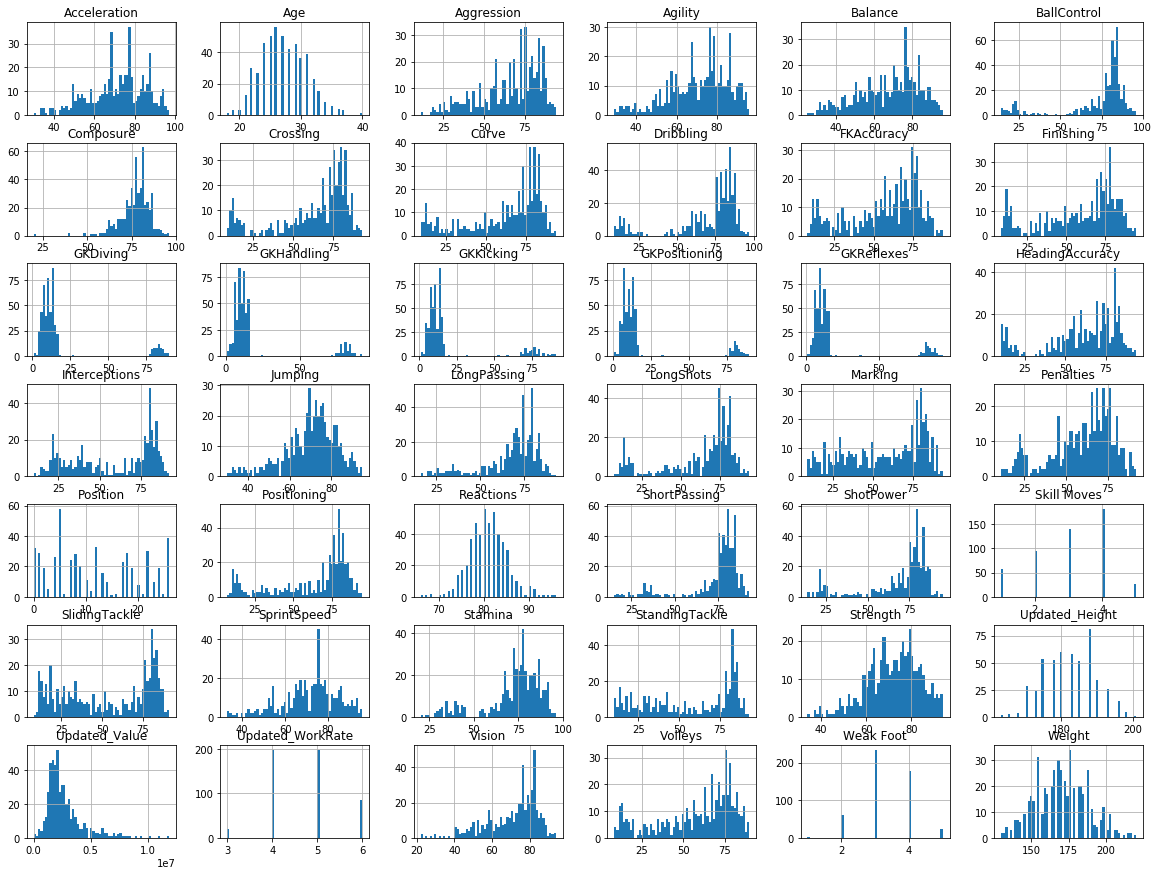

In [38]:
# histograms of the variables
dfle.hist(bins=60, figsize=(20,15))

In [39]:
dfle_X = dfle.drop('Updated_Value', axis='columns')
dfle_y = dfle['Updated_Value']

In [40]:
X = dfle_X.values
y = dfle_y.values

# Hands on Data Science Application

**1.      Build a machine learning model in Python or R to predict the value of each player in Euros.  Using a
technique of your choosing.  What attributes have the most impact on the model?**

Used a linear regression approach and with the initial attempt used all stats and player field position data. The below features were not considered as significant.

'Name','Contract Valid Until','Updated_Wage','Potential','Overall'

# Approach 1

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [42]:
# Split into a training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, y)

In [43]:
# Define the pipeline for scaling and model fitting
pipeline = Pipeline([
    ("MinMax Scaling", MinMaxScaler()),
    ("Linear Regression", LinearRegression())
])

In [44]:
# Scale the data and fit the model
pipeline.fit(X_train, Y_train)

Pipeline(steps=[('MinMax Scaling', MinMaxScaler()),
                ('Linear Regression', LinearRegression())])

In [45]:
# Evaluate the model
Y_pred = pipeline.predict(X_test)
print('Score', pipeline.score(X_test, Y_test))

Score 0.5338945664428449


# Approach 2

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [47]:
dfle2 = df_hot
dfle2['Position'] = le.fit_transform(dfle2['Position'])

In [48]:
dfle_X = dfle2.drop('Updated_Value', axis='columns')
X = dfle_X[['Age', 'Weak Foot', 'Skill Moves', 'Position', 'Weight', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes',
       'Updated_WorkRate', 'Updated_Height']].values
X

array([[ 31.,   4.,   4., ...,   8.,   4., 170.],
       [ 33.,   4.,   5., ...,  11.,   4., 188.],
       [ 26.,   5.,   5., ...,  11.,   5., 175.],
       ...,
       [ 28.,   3.,   4., ...,   7.,   6., 175.],
       [ 27.,   3.,   2., ...,  11.,   5., 188.],
       [ 31.,   3.,   1., ...,  82.,   4., 190.]])

In [49]:
y = dfle2['Updated_Value']
y

0      11050000
1       7700000
2      11850000
3       7200000
4      10200000
5       9300000
6       6700000
7       8000000
8       5100000
9       6800000
10      7700000
11      7650000
12      4400000
13      6000000
14      6300000
15      8900000
16      8350000
17      7800000
18      5800000
19      5350000
20      5150000
21      6000000
22      3800000
23      6450000
24      2700000
25      8100000
26      6950000
27      5950000
28      6950000
29      6200000
30      7350000
31      7350000
32      6950000
33      5900000
34      4600000
35      4300000
36      6000000
37      3600000
38      5700000
39      2400000
40      3000000
41       400000
42      5700000
43      6450000
44      5100000
45      6400000
46      3050000
47      6250000
48      5200000
49      3800000
50      4500000
51      3400000
52      4650000
53      4650000
54      3400000
55      6100000
56      5950000
57      4150000
58      5200000
59      4450000
60      5650000
61      5300000
62      

In [50]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('Position', OneHotEncoder(), [3])], remainder = 'passthrough')

In [51]:
# fit and transform
X = ct.fit_transform(X)
X

array([[  0.,   0.,   0., ...,   8.,   4., 170.],
       [  0.,   0.,   0., ...,  11.,   4., 188.],
       [  0.,   0.,   0., ...,  11.,   5., 175.],
       ...,
       [  0.,   0.,   0., ...,   7.,   6., 175.],
       [  0.,   0.,   0., ...,  11.,   5., 188.],
       [  0.,   0.,   0., ...,  82.,   4., 190.]])

In [52]:
# drop one of the columns
X = X[:,1:]
X

array([[  0.,   0.,   0., ...,   8.,   4., 170.],
       [  0.,   0.,   0., ...,  11.,   4., 188.],
       [  0.,   0.,   0., ...,  11.,   5., 175.],
       ...,
       [  0.,   0.,   0., ...,   7.,   6., 175.],
       [  0.,   0.,   0., ...,  11.,   5., 188.],
       [  0.,   0.,   0., ...,  82.,   4., 190.]])

In [53]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [54]:
model.fit(X,y)

LinearRegression()

In [55]:
model.predict(X)

array([9459794.3920369 , 6997875.38607484, 8764512.93566135,
       5748365.57613294, 6639265.6685449 , 7613710.85571376,
       4982479.45509009, 5970439.65973704, 4229842.94143   ,
       4060945.25384258, 5266209.64095543, 4748313.58456116,
       3140264.54837799, 4776383.04393683, 5249393.21807963,
       6837329.93935393, 6581558.98225044, 5920081.04634498,
       4067127.08858041, 3796982.14994427, 4395259.14560658,
       4853362.39916735, 5117126.6225462 , 5147481.73430917,
       1101909.30766039, 6300159.27537459, 5884821.92836899,
       3693608.86524832, 5474824.20128862, 5400631.69132983,
       4478852.46117734, 5320885.45683333, 5491028.26960981,
       4288520.96589599, 4520246.29864385, 4088935.07678676,
       4503448.35691874, 4115100.96785475, 4141901.23443169,
       2517409.72465926, 2881471.04187539, 1280926.79577498,
       4692649.33019455, 4503512.39837731, 1883062.17400347,
       4457918.39921419, 2667488.70906117, 4864538.28882837,
       4121420.09719969,

In [56]:
model.score(X,y)

0.6801761760521908

**2.      Develop a statistical mechanism to communicate the power of your model**

The adjusted R^2 is high

**3.      Create an artifact (PowerPoint, R Markdown, Python Notebook) to communicate your
methodology and findings**

Python notebook provided

**4.      Assume your stakeholders are the owners/ managers of these different soccer clubs and they are
trying to answer business questions to improve their overall team quality while reducing their
costs.  Develop 2 unique research questions that this data set can help solve and then answer those
questions with a data science technique (data analysis, visualization, ML, etc.)**

Using clustering approach, talent yet less known players can be discovered. A supervised approach such as decision trees 
can be used to segment the data into subgroups that are as similar as possible with respect to the target.